In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

In [3]:
df_cln = pd.read_csv('df_clean.csv')

## __3. Splitting ke Train Test set__

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import metrics

from sklearn.feature_selection import SelectPercentile
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.decomposition import PCA


In [5]:
df_mod = df_cln.copy()

In [6]:
df_fix = df_mod[['price','uses_ad_boosts','retail_price','rating_count','rating','badge_local_product','badge_product_quality','badge_fast_shipping','merchant_rating_count','merchant_rating','units_sold']]

In [7]:
df_fix

,price,uses_ad_boosts,retail_price,rating_count,rating,badge_local_product,badge_product_quality,badge_fast_shipping,merchant_rating_count,merchant_rating,units_sold
0,16.00,0,14,54,3.76,0,0,0,568,4.128521,100
1,8.00,1,22,6135,3.45,0,0,0,17752,3.899673,20000
2,8.00,0,43,14,3.57,0,0,0,295,3.989831,100
3,8.00,1,8,579,4.03,0,0,0,23832,4.020435,5000
4,2.72,1,3,20,3.10,0,0,0,14482,4.001588,100
...,...,...,...,...,...,...,...,...,...,...,...
1509,6.00,1,9,1367,4.08,0,0,0,5316,4.224605,10000
1510,2.00,1,56,28,3.07,0,0,0,4435,3.696054,100
1511,5.00,0,19,59,3.71,0,0,0,210,3.961905,100
1512,13.00,0,11,2,2.50,0,0,0,31,3.774194,100


In [8]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  1514 non-null   float64
 1   uses_ad_boosts         1514 non-null   int64  
 2   retail_price           1514 non-null   int64  
 3   rating_count           1514 non-null   int64  
 4   rating                 1514 non-null   float64
 5   badge_local_product    1514 non-null   int64  
 6   badge_product_quality  1514 non-null   int64  
 7   badge_fast_shipping    1514 non-null   int64  
 8   merchant_rating_count  1514 non-null   int64  
 9   merchant_rating        1514 non-null   float64
 10  units_sold             1514 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 130.2 KB


### Target

In [9]:
df_fix['units_sold']

0         100
1       20000
2         100
3        5000
4         100
        ...  
1509    10000
1510      100
1511      100
1512      100
1513      100
Name: units_sold, Length: 1514, dtype: int64

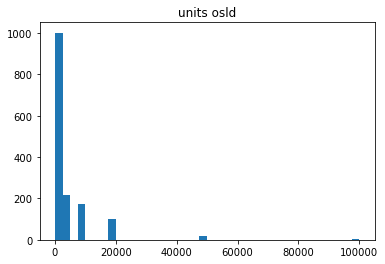

In [10]:
plt.hist(df_cln['units_sold'], bins=40)
plt.title('units osld')
plt.show()

C:\Users\BUDI PRIGUNANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


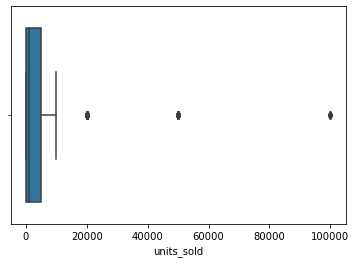

In [11]:
sns.boxplot(df_fix['units_sold'])
plt.show()

<ipython-input-12-9a0a85cfed2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['log_units_sold'] = np.log1p(df_fix['units_sold'])


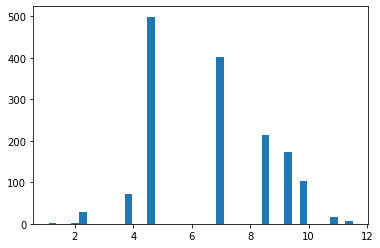

In [12]:
df_fix['log_units_sold'] = np.log1p(df_fix['units_sold'])
plt.hist(df_fix['log_units_sold'], bins=40)
plt.show()

C:\Users\BUDI PRIGUNANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


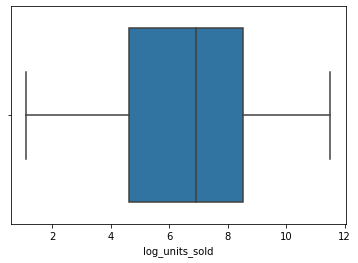

In [13]:
sns.boxplot(df_fix['log_units_sold'])
plt.show()

In [14]:
df_fix.drop('units_sold',axis = 1, inplace=True)

C:\Users\BUDI PRIGUNANDA\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
df_fix

,price,uses_ad_boosts,retail_price,rating_count,rating,badge_local_product,badge_product_quality,badge_fast_shipping,merchant_rating_count,merchant_rating,log_units_sold
0,16.00,0,14,54,3.76,0,0,0,568,4.128521,4.615121
1,8.00,1,22,6135,3.45,0,0,0,17752,3.899673,9.903538
2,8.00,0,43,14,3.57,0,0,0,295,3.989831,4.615121
3,8.00,1,8,579,4.03,0,0,0,23832,4.020435,8.517393
4,2.72,1,3,20,3.10,0,0,0,14482,4.001588,4.615121
...,...,...,...,...,...,...,...,...,...,...,...
1509,6.00,1,9,1367,4.08,0,0,0,5316,4.224605,9.210440
1510,2.00,1,56,28,3.07,0,0,0,4435,3.696054,4.615121
1511,5.00,0,19,59,3.71,0,0,0,210,3.961905,4.615121
1512,13.00,0,11,2,2.50,0,0,0,31,3.774194,4.615121


In [16]:
X = df_fix.drop(columns='log_units_sold')
y = df_fix['log_units_sold']

In [17]:
# X = df_fix.drop('log_units_sold',axis = 1)
# y = df_fix['units_sold']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### __4. Membuat Model__

#### RandomForest

In [19]:
df_fix.columns

Index(['price', 'uses_ad_boosts', 'retail_price', 'rating_count', 'rating',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'merchant_rating_count', 'merchant_rating', 'log_units_sold'],
      dtype='object')

In [20]:
model_1 = RandomForestRegressor(n_estimators = 1000,random_state = 42)
model_1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [21]:
from sklearn import metrics

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, RepeatedStratifiedKFold, cross_validate
rfc_score = cross_val_score(model_1, X_train, y_train, scoring='r2',cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.9s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s finished


In [23]:

rfc_score.mean()

0.9074309671873311

In [24]:
model_1.score(X_test,y_test)

0.8970931127182838

In [47]:
rfc_score.mean()

0.9074309671873311

### Score setelah di crossvalidate lebih tinggi

#### LinearRegression

In [25]:
model_2 = LinearRegression()
model_2.fit(X_train,y_train)

LinearRegression()

In [26]:
lin_score = cross_val_score(model_2, X_train, y_train, scoring='r2',cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


In [27]:
lin_score.mean()

0.372587964619831

In [28]:
model_2.score(X_test,y_test)

0.41948154511989433

In [29]:
model_2.score(X_test,y_test)

0.41948154511989433

In [51]:
scores = pd.DataFrame({'RandomForest':rfc_score.mean(),
                       'LinearRegression': lin_score.mean()},
                        index = [1])

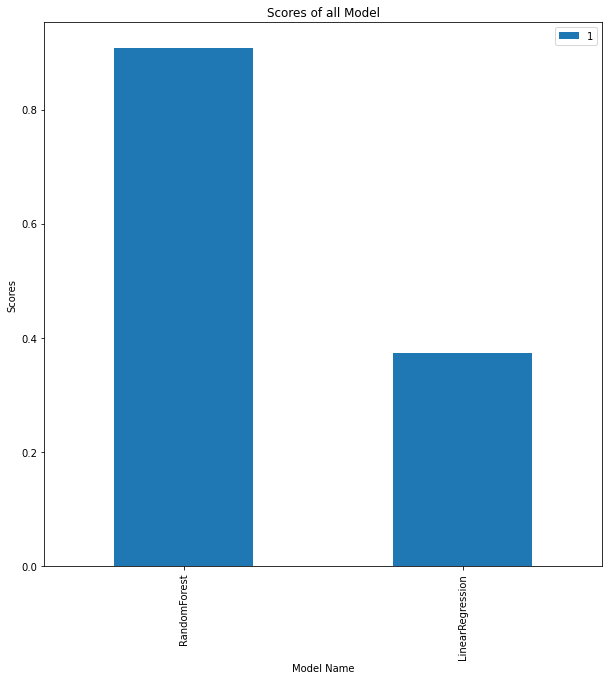

In [52]:
scores.T.plot(kind = 'bar',
              figsize = (10,10))
plt.title('Scores of all Model')
plt.xlabel('Model Name')
plt.ylabel('Scores');

# Optimization

## Pipeline

In [53]:
rfc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', model_1)
])


In [54]:
rfc_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('rfc', RandomForestRegressor(n_estimators=1000, random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'rfc': RandomForestRegressor(n_estimators=1000, random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'rfc__bootstrap': True,
 'rfc__ccp_alpha': 0.0,
 'rfc__criterion': 'mse',
 'rfc__max_depth': None,
 'rfc__max_features': 'auto',
 'rfc__max_leaf_nodes': None,
 'rfc__max_samples': None,
 'rfc__min_impurity_decrease': 0.0,
 'rfc__min_impurity_split': None,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 2,
 'rfc__min_weight_fraction_leaf': 0.0,
 'rfc__n_estimators': 1000,
 'rfc__n_jobs': None,
 'rfc__oob_score': False,
 'rfc__random_state': 42,
 'rfc__verbose': 0,
 'rfc__warm_start': False}

In [55]:
rfc_score2 = cross_val_score(rfc_pipe, X_train, y_train, scoring='r2',cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.3s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished


In [56]:
rfc_score2.mean()

0.9075045802653129

In [57]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
rfc_params = {'rfc__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'rfc__max_features': ['auto', 'sqrt'],
               'rfc__max_depth': max_depth,
               'rfc__min_samples_split': [2, 5, 10],
               'rfc__min_samples_leaf': [1, 2, 4],
               'rfc__bootstrap': [True, False]}

In [58]:
from sklearn.model_selection import RandomizedSearchCV
rfc_random = RandomizedSearchCV(rfc_pipe, param_distributions=rfc_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
rfc_random.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   41.7s finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rfc',
                                              RandomForestRegressor(n_estimators=1000,
                                                                    random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'rfc__bootstrap': [True, False],
                                        'rfc__max_depth': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90, 100,
                                                           110, None],
                                        'rfc__max_features': ['auto', 'sqrt'],
                                        'rfc__min_samples_leaf': [1, 2, 4],
                                        'rfc__min_samples_split': [2, 5, 10],
                                        'rfc__n_estimators': [200, 400, 600,
                            

In [59]:
rfc_tuned = rfc_random.best_estimator_
rfc_tuned_score = cross_val_score(rfc_tuned, X_train, y_train, scoring='r2', cv=5, n_jobs=-1, verbose=1)
rfc_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.8s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.9s finished


array([0.90519529, 0.90375636, 0.91252411, 0.89600188, 0.91409871])

In [60]:
rfc_tuned_score.mean()

0.906315269757201

In [41]:
import joblib

In [42]:
joblib.dump(rfc_tuned,'best_model_fin_pro')

['best_model_fin_pro']

In [ ]:
X

In [ ]:
X_train

In [ ]:
X.describe()

In [43]:
a = float(input('price ? '))
b = int(input('uses_ad_boosts ? '))
c = int(input('retail_price ? '))
d = int(input('rating_count ? '))
e = float(input('rating ? '))
f = int(input('badge_local_product ? '))
g = int(input('badge_product_quality ? '))
h = int(input('badge_fast_shipping ? '))
i = int(input('merchant_rating_count ? '))
j = float(input('merchant_rating ? '))

# price ?  12
# uses_ad_boosts ?  1
# retail_price ?  200
# rating_count ?  10000
# rating ?  5
# badge_local_product ?  1
# badge_product_quality ?  1
# badge_fast_shipping ?  1
# merchant_rating_count ?  100000
# merchant_rating ?  4


df = pd.DataFrame([[a,b,c,d,e,f,g,h,i,j]],columns = X_test.columns)
df

price ?  12
uses_ad_boosts ?  1
retail_price ?  200
rating_count ?  10000
rating ?  5
badge_local_product ?  1
badge_product_quality ?  1
badge_fast_shipping ?  1
merchant_rating_count ?  100000
merchant_rating ?  4


,price,uses_ad_boosts,retail_price,rating_count,rating,badge_local_product,badge_product_quality,badge_fast_shipping,merchant_rating_count,merchant_rating
0,12.0,1,200,10000,5.0,1,1,1,100000,4.0


In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  1514 non-null   float64
 1   uses_ad_boosts         1514 non-null   int64  
 2   retail_price           1514 non-null   int64  
 3   rating_count           1514 non-null   int64  
 4   rating                 1514 non-null   float64
 5   badge_local_product    1514 non-null   int64  
 6   badge_product_quality  1514 non-null   int64  
 7   badge_fast_shipping    1514 non-null   int64  
 8   merchant_rating_count  1514 non-null   int64  
 9   merchant_rating        1514 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 118.4 KB


In [44]:
hh = rfc_tuned.predict(df)

In [61]:
print("Your expected Sales is",(np.expm1(hh)[0]).round(2))


Your expected Sales is 35164.34


In [ ]:
sns.boxplot(df_fix['log_units_sold'])
plt.show()